<a href="https://colab.research.google.com/github/hishaam19/RockID/blob/TrainingModelsAlex/Xception82%25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#!unzip '/content/drive/MyDrive/RoughGemstonesTrain.zip'

Archive:  /content/drive/MyDrive/RoughGemstonesTrain.zip
replace RoughGemstonesTrain/test/agate/agate__103.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:


import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,regularization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import regularizers
import seaborn as sns
print(tf. __version__)

2.12.0


In [3]:
img_width=299
img_height=299
batch_size=32
num_of_classes=17

TRAIN_DIR= "/content/RoughGemstonesTrain/train"
TEST_DIR= "/content/RoughGemstonesTrain/test"
VAL_DIR = "/content/RoughGemstonesTrain/val"

In [4]:
#preprocessing datasets
train_data = ImageDataGenerator(
                                    rescale=1./255,

                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=False,
                                    rotation_range=30 )


val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False,
                                                target_size=(img_height, img_width))

test_gen = test_data.flow_from_directory(TEST_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False,
                                                target_size=(img_height, img_width))


"""val_gen=tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)
test_gen=tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)"""

Found 6616 images belonging to 19 classes.
Found 1889 images belonging to 19 classes.
Found 956 images belonging to 19 classes.


"val_gen=tf.keras.utils.image_dataset_from_directory(\n    VAL_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)\ntest_gen=tf.keras.utils.image_dataset_from_directory(\n    TEST_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)"

In [5]:
model=Sequential()
pretrained_model=tf.keras.applications.Xception(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),pooling='max')
for layer in pretrained_model.layers:
  layer.trainable = True


#model.add(Dense(512,bias_regularizer='l1_l2',kernel_regularizer='l1_l2',activity_regularizer='l1_l2',activation='relu'))
model.add(pretrained_model)
#model.add(BatchNormalization())
#model.add(Flatten())
#model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(19, activation='softmax'))

"""model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(70, activation='softmax'))"""


model.compile(optimizer=Adam(learning_rate=0.00001),
      loss='categorical_crossentropy',
      metrics =['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 19)                9747      
                                                                 
Total params: 23,494,203
Trainable params: 23,439,675
No

In [10]:
ModelCallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]

history = model.fit(train_gen,epochs=30,verbose=1,validation_data=val_gen,callbacks=ModelCallbacks )

Epoch 1/30
207/207 [==============================] - 244s 1s/step - loss: 6.8459 - accuracy: 0.9572 - val_loss: 7.3249 - val_accuracy: 0.8301
Epoch 2/30
207/207 [==============================] - 235s 1s/step - loss: 6.6763 - accuracy: 0.9565 - val_loss: 7.1952 - val_accuracy: 0.8258
Epoch 3/30
207/207 [==============================] - 243s 1s/step - loss: 6.5003 - accuracy: 0.9636 - val_loss: 7.0349 - val_accuracy: 0.8253
Epoch 4/30
207/207 [==============================] - 240s 1s/step - loss: 6.3382 - accuracy: 0.9621 - val_loss: 6.8655 - val_accuracy: 0.8211
Epoch 5/30
207/207 [==============================] - 234s 1s/step - loss: 6.1878 - accuracy: 0.9625 - val_loss: 6.6820 - val_accuracy: 0.8264
Epoch 6/30
207/207 [==============================] - 231s 1s/step - loss: 5.9979 - accuracy: 0.9716 - val_loss: 6.5619 - val_accuracy: 0.8280
Epoch 7/30
207/207 [==============================] - 232s 1s/step - loss: 5.8489 - accuracy: 0.9677 - val_loss: 6.4228 - val_accuracy: 0.8343

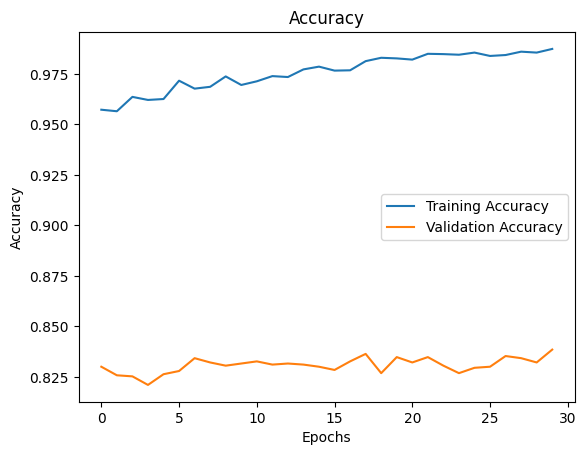

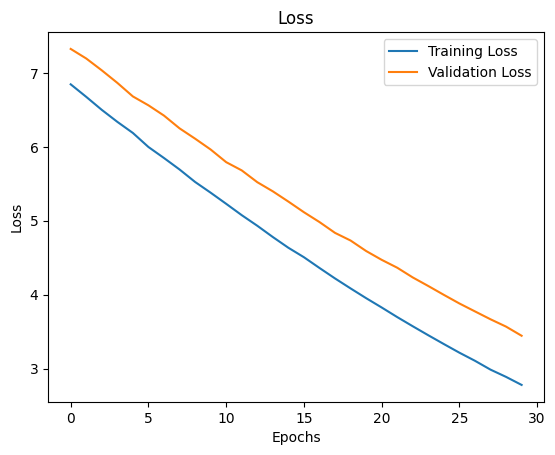

In [11]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print("Evaluate test data")
#Save model
#tf.keras.saving.save_model("/content/sample_data/")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the evaluation metrics
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

In [15]:
model.save('/content/drive/MyDrive/82%rough.h5')
model.save_weights('/content/drive/MyDrive/model_weights1.h5')
# Compute the confusion matrix

predictions = model.predict(test_gen)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_gen.classes

incorrectly_predicted_indices = np.where(predicted_labels != true_labels)[0]
incorrectly_predicted_labels = predicted_labels[incorrectly_predicted_indices]
true_labels_of_incorrect = true_labels[incorrectly_predicted_indices]

30/30 [==============================] - 7s 246ms/step


[ 0  1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  4
  4  4  4  4  4  4  5  5  5  5  5  6  6  6  6  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  9  9 10 10 10 10 10 10 10 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 13 13 13 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 18 18 18
 18 18 18]
{'agate': 0, 'alexandrite': 1, 'amethyst': 2, 'aquamarine': 3, 'citrine': 4, 'diamond': 5, 'emerald': 6, 'garnet': 7, 'jade': 8, 'lapis Lazuli': 9, 'moonstone': 10, 'morganite': 11, 'opal': 12, 'peridot': 13, 'ruby': 14, 'sapphire': 15, 'tanzanite': 16, 'topaz': 17, 'turquoise': 18}


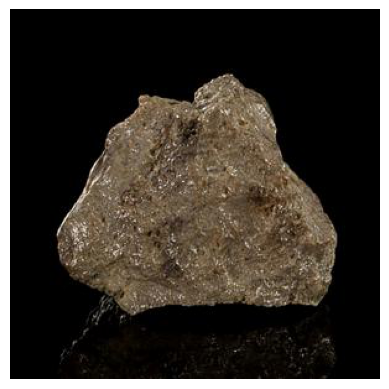

1/1 [==============================] - 0s 27ms/step
[[1.6636073e-04 1.1751666e-01 2.3187576e-03 1.8036600e-04 1.1537370e-04
  7.9655135e-01 1.7441787e-04 4.9486045e-02 2.4634518e-04 2.8689439e-05
  9.4346658e-05 1.3812165e-02 8.0054486e-03 8.6327508e-04 1.4164754e-03
  4.4448343e-03 3.1271047e-04 4.1973023e-03 6.9165784e-05]]
Maximum index: 5
0.79655135
The model is predicting this rock as: diamond


In [22]:
classes=['agate', 'alexandrite', 'amethyst', 'aquamarine', 'citrine',
         'diamond', 'emerald', 'garnet', 'jade', 'lapis Lazuli', 'moonstone',
 'morganite', 'opal', 'peridot', 'ruby', 'sapphire', 'tanzanite', 'topaz', 'turquoise']
print(true_labels_of_incorrect )
#model1 = tf.keras.models.load_model('gem79%1.h5')
label_dict = train_gen.class_indices
print(label_dict)
img = tf.keras.preprocessing.image.load_img('/content/RoughGemstonesTrain/test/diamond/diamond__127.jpg',
                                            target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# Rescale the image array
img_array = img_array / 255.0
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = tf.expand_dims(img_array, axis=0)
#preprocessed_img = preprocess_input(img_array)
predictions = model.predict(img_array)
print(predictions)
max_index = np.argmax(predictions)
print("Maximum index:", max_index)
print(predictions[0][max_index])
print("The model is predicting this rock as:",classes[max_index])